### Support Vector Machines(SVM)

#### Linear SVM Classification

large margin classification

**SVM is sensitive to the feature scales**

* Hard Margin Classification 
* Soft Margin Classification (more flexible model, accept some outliers)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)

In [4]:
svm_clf = Pipeline((('scaler', StandardScaler()), ('linear_svc', LinearSVC(C=1, loss='hinge'))))
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [6]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


In [7]:
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)
svm_clf.coef_, svm_clf.intercept_

(array([[1.29411744, 0.82352928]]), array([-3.78823471]))

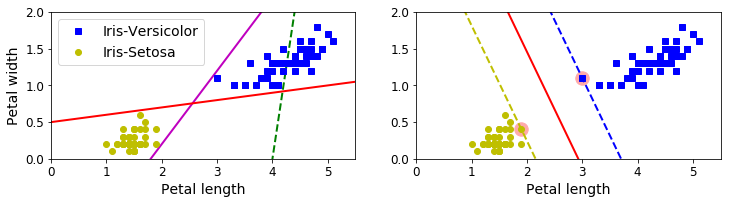

In [8]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "r-", linewidth=2)
    plt.plot(x0, gutter_up, "b--", linewidth=2)
    plt.plot(x0, gutter_down, "y--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### Sensitivity to feature scales

[-2, 2, -2, 2]

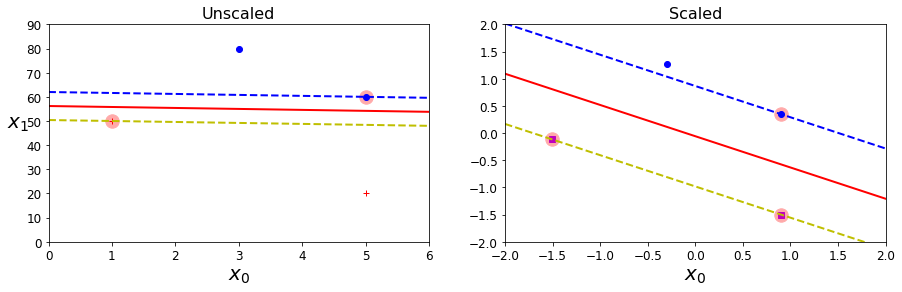

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'bo')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'r+')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

In [10]:
X_scaled

array([[-1.50755672, -0.11547005],
       [ 0.90453403, -1.5011107 ],
       [-0.30151134,  1.27017059],
       [ 0.90453403,  0.34641016]])

### Sensitivity to outliers

* C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。
* C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

[0, 5.5, 0, 2]

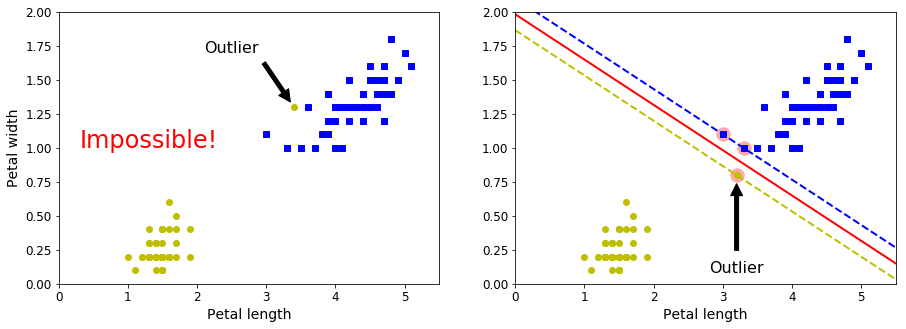

In [11]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

### Nonlinear SVM Classification

SVM处理线性不可分问题

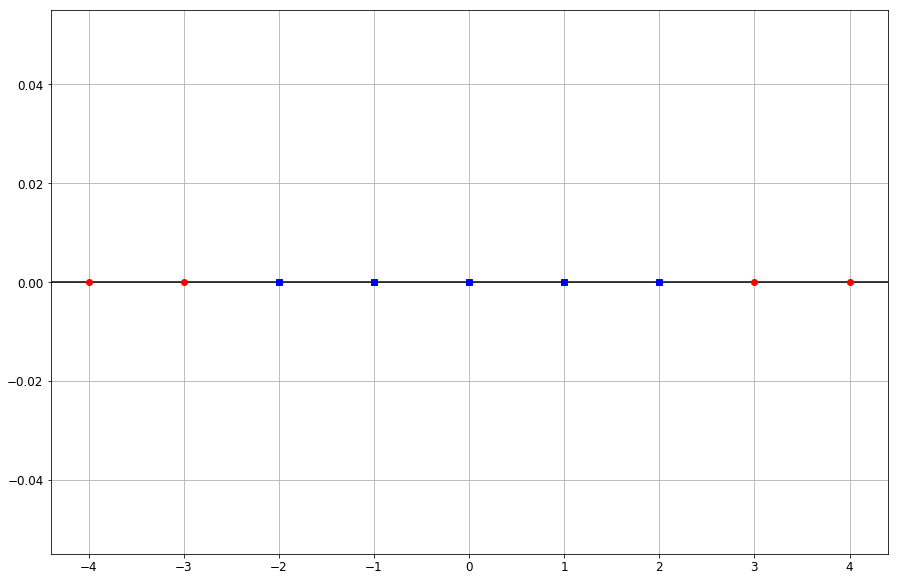

In [20]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(15, 10))
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:,0][y==0], np.zeros(4), 'ro')
plt.plot(X1D[:,0][y==1], np.zeros(5), 'bs')

添加新feature使数据线性可分

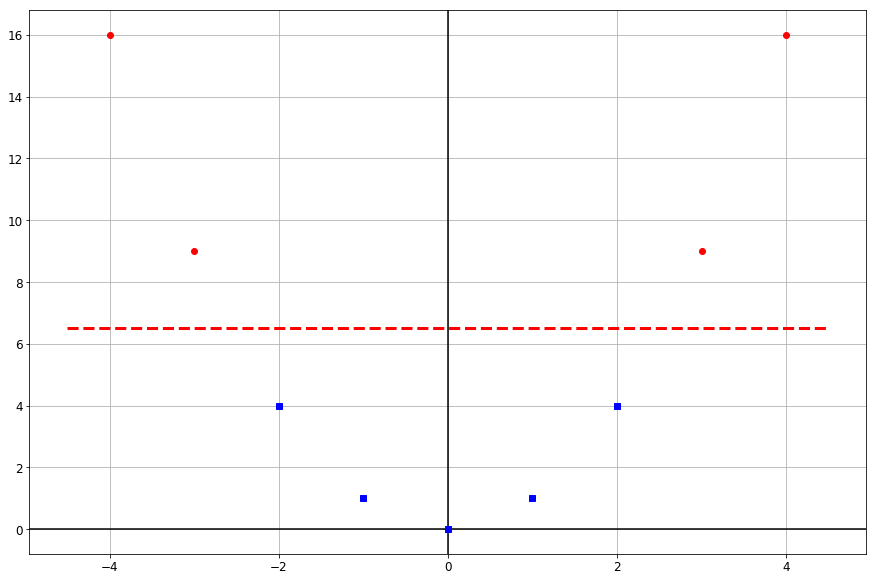

In [24]:
X2D = np.c_[X1D, X1D ** 2]

plt.figure(figsize=(15, 10))

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.plot(X1D[:,0][y==0], X2D[:,1][y==0], 'ro')
plt.plot(X1D[:,0][y==1], X2D[:,1][y==1], 'bs')
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)

In [27]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

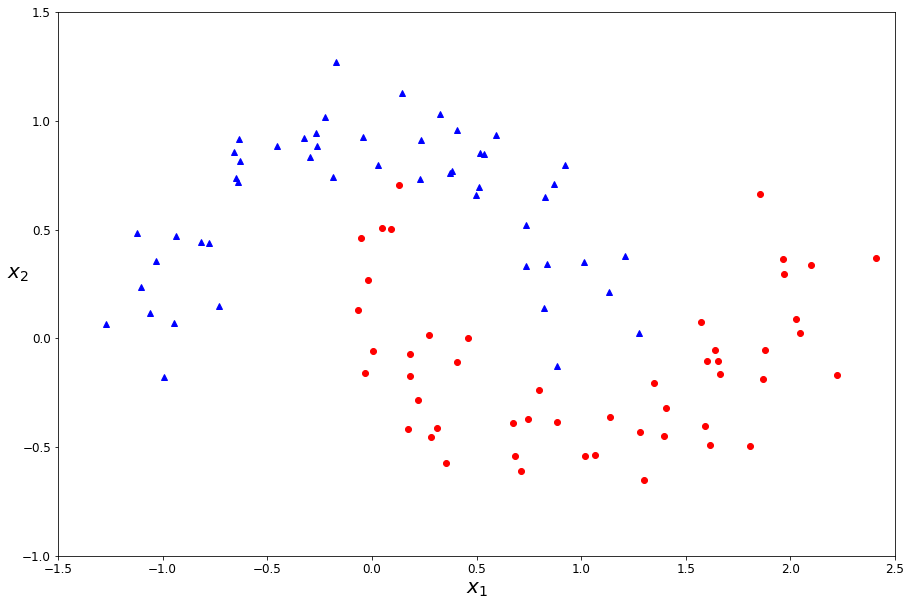

In [67]:
x, y = make_moons(noise=0.15, random_state=42)

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], 'b^')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'ro')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.axis(axes)

plt.figure(figsize=(15, 10))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

In [68]:
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
))
polynomial_svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

[[-19.52148105 -18.066174   -16.65716579 ...  43.93548619  45.25326623
   46.61544452]
 [-19.56746466 -18.12804985 -16.73493346 ...  42.34992641  43.65185527
   44.99818281]
 [-19.59528612 -18.17145491 -16.79392169 ...  40.81246747  42.09885381
   43.42963924]
 ...
 [-44.32540839 -42.97459094 -41.67003126 ...   9.18729339  10.4045677
   11.66628133]
 [-45.92249939 -44.55763548 -43.23902891 ...   8.95468088  10.18604272
   11.46184431]
 [-47.57044565 -46.19122662 -44.85826451 ...   8.70115182   9.94690985
   11.23710804]]


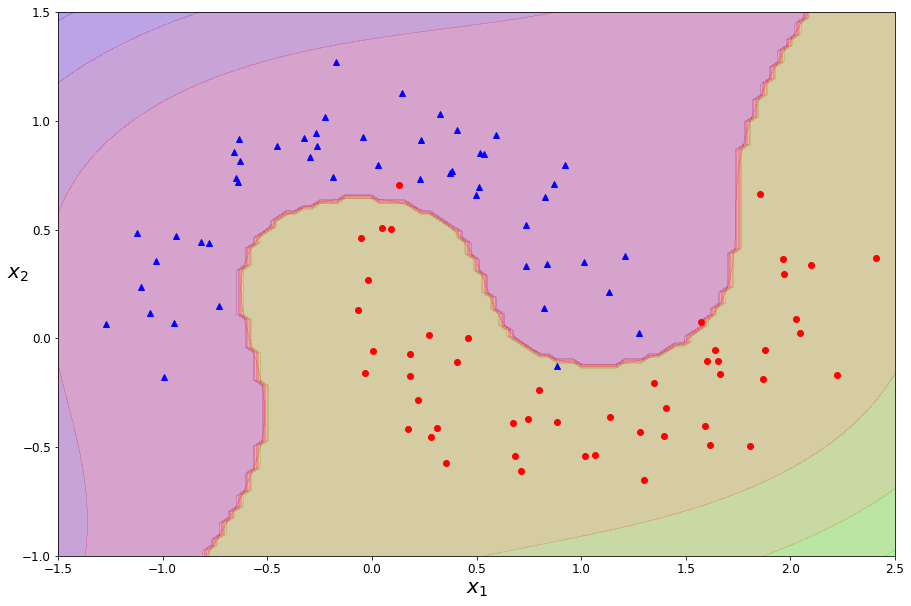

In [69]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    print(y_decision)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(15, 10))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

### Use Kernel Tricks

[[-128.54939566 -121.84427649 -115.34567823 ...  231.55932495
   239.44199418  247.56077458]
 [-127.36883458 -120.73537683 -114.30899651 ...  223.84687746
   231.6244372   239.63798082]
 [-126.12728848 -119.56382226 -113.20799137 ...  216.35210765
   224.02613013  231.93600858]
 ...
 [-259.14424397 -251.10437565 -243.33200803 ...   15.0997627
    20.57100603   26.26270619]
 [-269.03616717 -260.88953365 -253.01110927 ...   13.03395491
    18.56753993   24.32138095]
 [-279.2330342  -270.97760969 -262.99110451 ...   10.85280822
    16.450631     22.26850803]]


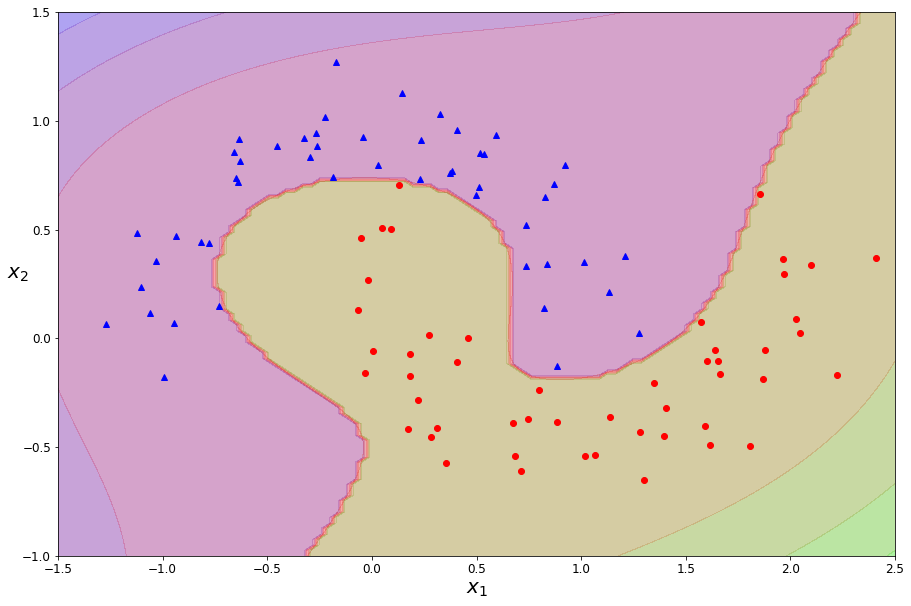

In [73]:
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
))

poly_kernel_svm_clf.fit(x, y)
plt.figure(figsize=(15, 10))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

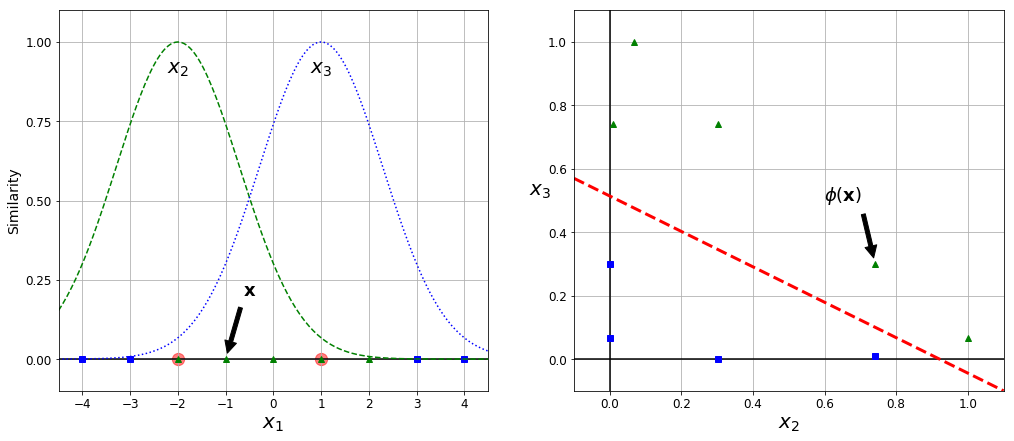

In [98]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1) ** 2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

** So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it **

[[0.01204175 0.01204167 0.01204157 ... 0.01259972 0.01244459 0.0123276 ]
 [0.01204137 0.01204118 0.01204096 ... 0.01294351 0.01269391 0.01250515]
 [0.01204056 0.01204014 0.01203967 ... 0.01346501 0.01307269 0.01277524]
 ...
 [0.01202301 0.01200948 0.01198672 ... 0.0120428  0.01204262 0.01204247]
 [0.01202875 0.01201883 0.01200184 ... 0.0120424  0.01204231 0.01204225]
 [0.01203271 0.01202544 0.01201278 ... 0.01204221 0.01204217 0.01204214]]


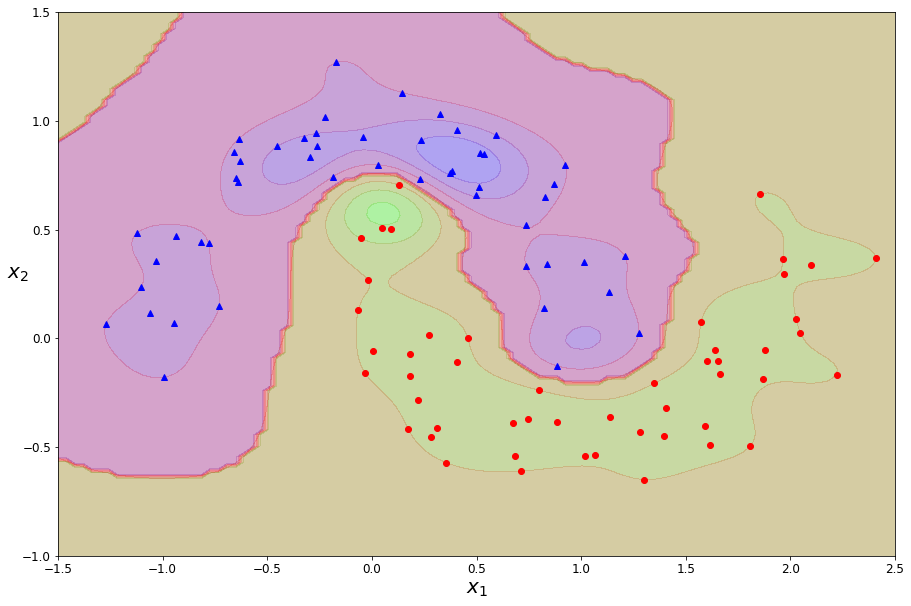

In [97]:
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=100))
))

rbf_kernel_svm_clf.fit(x, y)
plt.figure(figsize=(15, 10))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])

### SVM Regression

In [99]:
from sklearn.svm import SVR

In [100]:
m_examples = 50
x = 2 * np.random.rand(m_examples, 1)
y = (4 + 3 * x + np.random.randn(m_examples, 1)).ravel()
x, y

(array([[0.84987815],
        [0.37277047],
        [1.83900211],
        [1.80883752],
        [0.09664065],
        [1.64910046],
        [1.73484796],
        [0.43195542],
        [1.74446152],
        [0.6361498 ],
        [0.1124625 ],
        [0.12544778],
        [1.45672791],
        [0.03267012],
        [1.3826116 ],
        [0.12198621],
        [0.02009481],
        [0.20375774],
        [0.47970066],
        [1.02538083],
        [0.98110703],
        [0.6015776 ],
        [0.2992602 ],
        [1.70810329],
        [0.61321648],
        [0.98088043],
        [1.54761336],
        [1.19508289],
        [0.06809166],
        [1.33632071],
        [0.03008952],
        [1.66159393],
        [0.76748294],
        [0.06778268],
        [0.80853332],
        [0.91599107],
        [1.33270787],
        [1.16928503],
        [1.72552411],
        [1.85202679],
        [0.50751993],
        [1.95468187],
        [1.58787951],
        [0.42664465],
        [1.73860988],
        [1

In [111]:
svr = SVR(kernel='linear', epsilon=1)
svr.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

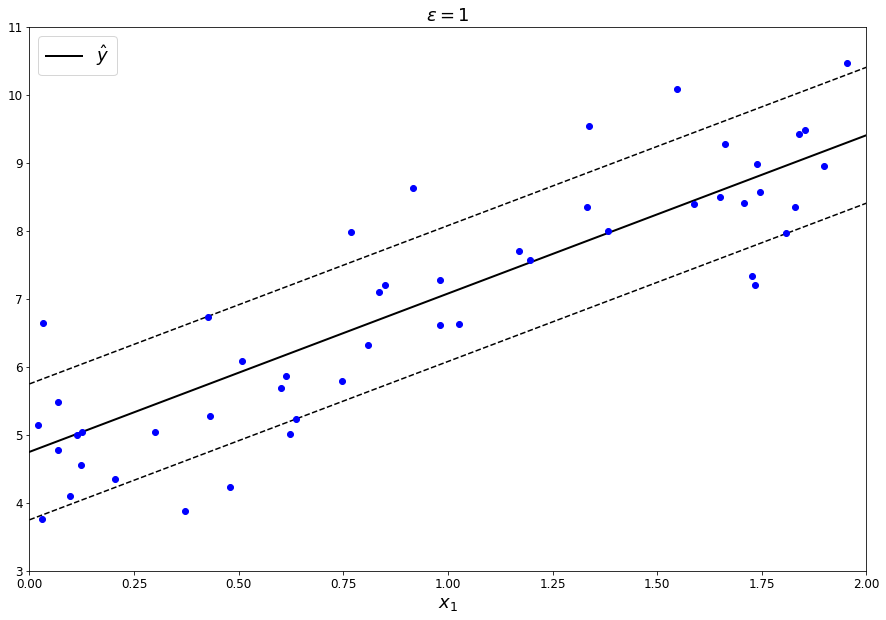

In [113]:
def plot_svr(svm_reg, x, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.plot(x, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    plt.title(r"$\epsilon = {}$".format(svm_reg.epsilon), fontsize=18)


plt.figure(figsize=(15, 10))
plot_svr(svr, x, y, [0, 2, 3, 11])

In [119]:
m_examples = 50
x = 2 * np.random.rand(m_examples, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x ** 2 + np.random.randn(m_examples, 1)/10).ravel()
x, y

(array([[ 0.53479135],
        [-0.82523771],
        [-0.67813906],
        [-0.06003291],
        [ 0.18446319],
        [-0.20804467],
        [-0.54424757],
        [ 0.39191918],
        [ 0.52397051],
        [-0.47961921],
        [ 0.40150183],
        [ 0.88540622],
        [-0.74080975],
        [ 0.85664621],
        [ 0.49716815],
        [ 0.9192219 ],
        [-0.38024357],
        [ 0.23959694],
        [ 0.41552406],
        [-0.79754332],
        [ 0.77462471],
        [-0.96736133],
        [-0.93974322],
        [ 0.35438704],
        [ 0.40584174],
        [-0.92103862],
        [ 0.52582871],
        [ 0.43540591],
        [ 0.40959833],
        [ 0.27879612],
        [ 0.33024299],
        [ 0.28872923],
        [ 0.16294523],
        [ 0.6255859 ],
        [ 0.09203415],
        [ 0.55564229],
        [ 0.51575983],
        [ 0.20914027],
        [-0.85231621],
        [-0.91242364],
        [ 0.78547085],
        [ 0.52496276],
        [-0.95324002],
        [-0

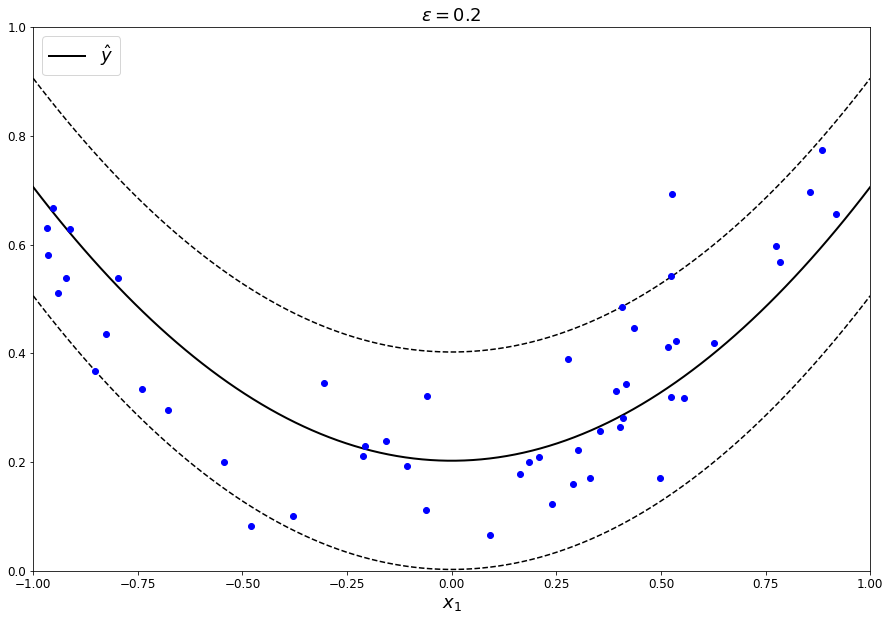

In [122]:
poly_svr = SVR(kernel='poly', degree=2, C=100, epsilon=0.2)
poly_svr.fit(x, y)

plt.figure(figsize=(15, 10))
plot_svr(poly_svr, x, y, [-1, 1, 0, 1])

### 超平面分隔数据

In [142]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  
x, y

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.7, 0.4],
        [1.4, 0.3],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.5, 0.2],
        [1.6, 0.2],
        [1.4, 0.1],
        [1.1, 0.1],
        [1.2, 0.2],
        [1.5, 0.4],
        [1.3, 0.4],
        [1.4, 0.3],
        [1.7, 0.3],
        [1.5, 0.3],
        [1.7, 0.2],
        [1.5, 0.4],
        [1. , 0.2],
        [1.7, 0.5],
        [1.9, 0.2],
        [1.6, 0.2],
        [1.6, 0.4],
        [1.5, 0.2],
        [1.4, 0.2],
        [1.6, 0.2],
        [1.6, 0.2],
        [1.5, 0.4],
        [1.5, 0.1],
        [1.4, 0.2],
        [1.5, 0.1],
        [1.2, 0.2],
        [1.3, 0.2],
        [1.5, 0.1],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.3, 0.3],
        [1.3, 0.3],
        [1.3, 0.2],
        [1.6, 0.6],
        [1.9, 0.4],
        [1.4, 0.3],
        [1.6, 0.2],
        [1.4, 0.2],
        [1.5, 0.2],
        [1.4, 0.2],


In [165]:
svm_clf = LinearSVC(C=10, loss="hinge")
svm_clf.fit(x, y)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [166]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
w, b

(array([0.88490102, 3.46934546]), -10.016118452705458)

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'$h = \\mathbf{w}^t \\cdot \\mathbf{x} + b$')

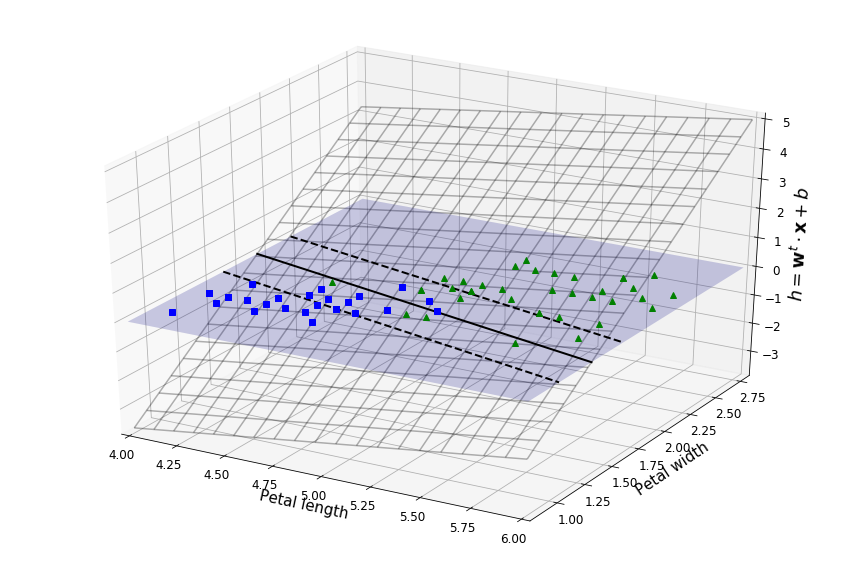

In [167]:
x1_lim=[4, 6]
x2_lim=[0.8, 2.8]
x1_in_bounds = (x[:, 0] > x1_lim[0]) & (x[:, 0] < x1_lim[1])
X_crop = x[x1_in_bounds]
y_crop = y[x1_in_bounds]
x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
x1, x2 = np.meshgrid(x1s, x2s)
xs = np.c_[x1.ravel(), x2.ravel()]
df = (xs.dot(w) + b).reshape(x1.shape)
m = 1 / np.linalg.norm(w)
boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1s, x2, np.zeros_like(x1),color="b", alpha=0.2, cstride=100, rstride=100)
ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")

ax.axis(x1_lim + x2_lim)
ax.set_xlabel(r"Petal length", fontsize=15)
ax.set_ylabel(r"Petal width", fontsize=15)
ax.set_zlabel(r"$h = \mathbf{w}^t \cdot \mathbf{x} + b$", fontsize=18)
